# Keras를 이용한 ML 기본이미지 분류

In [23]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)
print(train_labels)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
[9 0 0 ... 3 0 5]


## **데이터전처리**

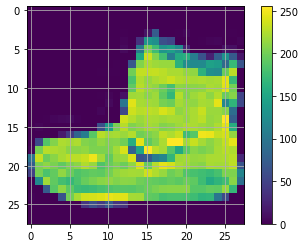

In [29]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(True)
plt.show()
#픽셀값의 범위가 0~255이다! --> 0~1사이로 조정 필요

In [ ]:
#신경망 모델에 주입하기: 
#1. 픽셀값 범위 0~1로 조정하기 (train, test 동일방식으로!)
train_images = train_images / 255.0
test_images = test_images / 255.0

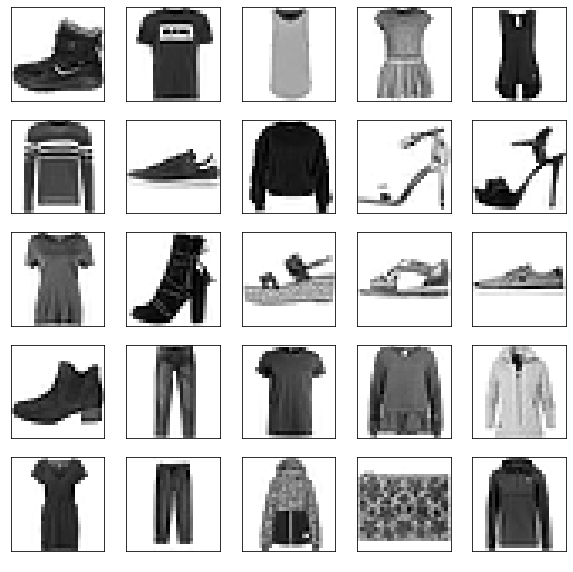

In [39]:
#2. 훈련세트에서 처음 25개 이미지 + 클래스이름 출력하기
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]], color = 'white')
plt.show()

## **모델 구성하기**

### **층 설정하기**

In [42]:
#층: 신경망의 기본구성요소. 주입된 데이터에서 '표현'추출
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   
    #2차원 배열(28, 28) -> 1차원배열/학습되는 가중치 x. 데이터 변환 only
    keras.layers.Dense(128, activation='relu'),   
    #'밀집연결'(densely-connected) or '완전연결'(fully-connected)/첫번째 인자: 노드(뉴런) 수
    keras.layers.Dense(10, activation='softmax')  
    #softmax: x개의 확률(현재 이미지가 x개 클래스 중 하나에 속할 확률)을 반환하고 반환된 값의 전체 합은 1. 
])

### **모델 컴파일하기**

In [44]:
#모델 훈련 전 필요한 설정 추가하기:
#손실함수(loss function): 훈련하는 동안 모델의 오차 측정. 최소화하도록!
#옵티마이저(optimizer): 데이터와 손실함수를 바탕으로 업데이트 방향 결정
#지표(metrics): 훈련단계와 테스트단계 모니터링 위해 사용.   <------------?
model.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy']
              )

### **모델 훈련하기**

In [51]:
#1. 훈련 데이터 모델에 주입하기 


#2. 모델이 이미지와 레이블을 매핑하는 방법 배우기
#훈련시작: 모델이 훈련데이터 학습
model.fit(train_images, train_labels, epochs=5)

#정확도 평가: 테스트세트에서 모델 성능 비교하기
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\n테스트 정확도:', test_acc)
#테스트정확도 < 훈련세트정확도  <----- 과대적합(overfitting)때문


#3. 테스트 세트에 대한 모델의 예측 만들기 
predictions = model.predict(test_images)
predictions[0]   #10개의 숫자배열 --10개의 옷품목에 상응하는 모델의 신뢰도(confidence)
np.argmax(predictions[0])  #가장 높은 신뢰도를 가진 레이블 찾기  --9(=class_name[9])
test_labels[0]

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 40us/sample - loss: 0.4647 - accuracy: 0.8411
Epoch 2/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4621 - accuracy: 0.8400
Epoch 3/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4596 - accuracy: 0.8405
Epoch 4/5
60000/60000 [==============================] - 2s 37us/sample - loss: 0.4546 - accuracy: 0.8429
Epoch 5/5
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4660 - accuracy: 0.8415
10000/10000 - 0s - loss: 0.6123 - accuracy: 0.8160

테스트 정확도: 0.816


9

In [62]:
#10개 클래스에 대한 예측을 모두 그래프로 표현하기:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else: 
        color = 'red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color = 'white')

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color = "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

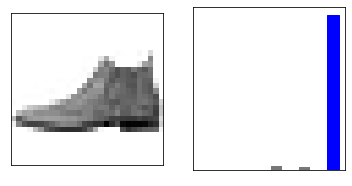

In [61]:
i = 0
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

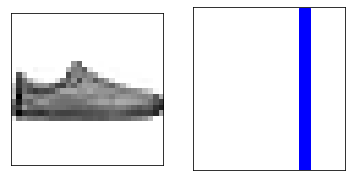

In [63]:
i = 12
plt.figure(figsize = (6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

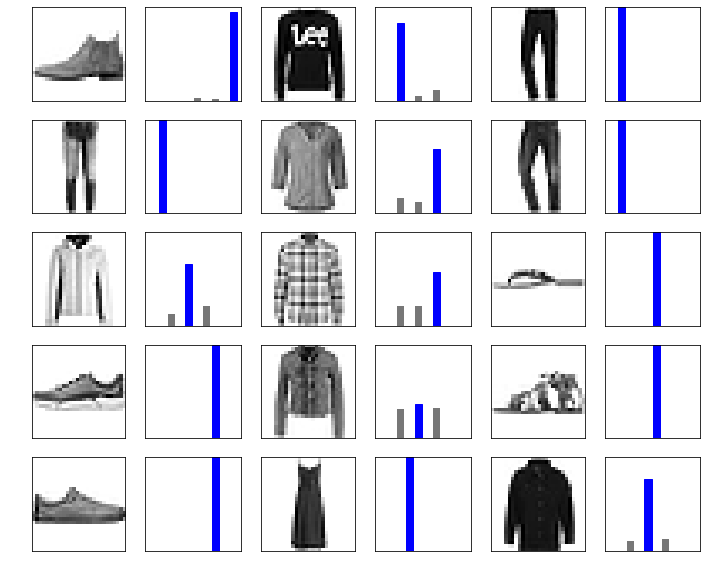

In [64]:
#처음 X개의 테스트 이미지와 예측레이블, 진짜레이블 출력하기
#올바른 예측은 파란색, 잘못된 예측은 빨간색
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize = (2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()

(28, 28)
(1, 28, 28)
[[0.0000000e+00 4.1342403e-30 0.0000000e+00 2.6557907e-28 0.0000000e+00
  2.7029129e-02 0.0000000e+00 2.1969665e-02 8.9009102e-14 9.5100123e-01]]


9

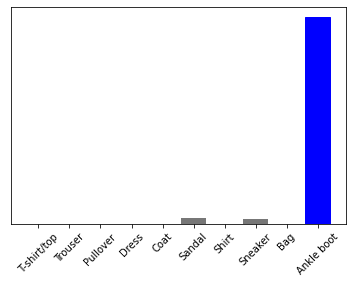

In [71]:
#훈련된 모델을 사용하여 한 이미지에 대한 예측 만들기:
#테스트 세트에서 이미지 하나 선택하기
img = test_images[0]
print(img.shape)     
#하나의 이미지를 사용할 때에도 2차원 배열로 만들어야 함.(배치에 추가) 
img = (np.expand_dims(img, 0))
print(img.shape)

#예측만들기
predictions_single = model.predict(img)
print(predictions_single)
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

#첫번쨰 이미지 예측하기 (remember, model.predict는 2차원 넘파이 배열을 반환)
np.argmax(predictions_single[0])